In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


## Data Collection and Cleaning 

In [2]:
image1 = pd.read_csv("image_data/image1.txt",delimiter=r"\s+",names=['y','x','expert_label','NDAI','SD','CORR','rad_angle_DF','rad_angle_CF','rad_angle_BF','rad_angle_AF','rad_angle_AN'])
image2 = pd.read_csv("image_data/image2.txt",delimiter=r"\s+",names=['y','x','expert_label','NDAI','SD','CORR','rad_angle_DF','rad_angle_CF','rad_angle_BF','rad_angle_AF','rad_angle_AN'])
image3 = pd.read_csv("image_data/image3.txt",delimiter=r"\s+",names=['y','x','expert_label','NDAI','SD','CORR','rad_angle_DF','rad_angle_CF','rad_angle_BF','rad_angle_AF','rad_angle_AN'])
#image1['expert_label'] = image1['expert_label'].apply(str)
data = {'Image1':image1,'Image2':image2,'Image3':image3}
image1['expert_label'].replace(1,'cloud',inplace=True)
image1['expert_label'].replace(-1,'not_cloud',inplace=True)
image1['expert_label'].replace(0,'unlabeled',inplace=True)
image2['expert_label'].replace(1,'cloud',inplace=True)
image2['expert_label'].replace(-1,'not_cloud',inplace=True)
image2['expert_label'].replace(0,'unlabeled',inplace=True)
image3['expert_label'].replace(1,'cloud',inplace=True)
image3['expert_label'].replace(-1,'not_cloud',inplace=True)
image3['expert_label'].replace(0,'unlabeled',inplace=True)

# Part 1
## EDA  

Summarizing the data

In [3]:
image1.describe()

,y,x,NDAI,SD,CORR,rad_angle_DF,rad_angle_CF,rad_angle_BF,rad_angle_AF,rad_angle_AN
count,115229.000000,115229.000000,115229.000000,115229.000000,115229.000000,115229.000000,115229.000000,115229.000000,115229.000000,115229.000000
mean,193.152982,218.252402,0.871229,5.371955,0.160203,272.050141,254.085701,237.375468,215.893527,199.872984
std,110.273173,87.084083,1.432188,6.629032,0.086195,43.071194,46.995037,48.052027,45.544272,41.846728
min,2.000000,65.000000,-1.617164,0.251537,-0.327130,62.005207,38.151493,32.085110,28.937529,31.938208
25%,98.000000,143.000000,-0.528429,1.464694,0.117813,260.348660,245.781160,231.355740,212.542500,199.395860
50%,193.000000,218.000000,0.859061,2.889678,0.151024,285.522090,269.685420,255.835590,234.782680,215.092830
75%,289.000000,294.000000,2.089412,6.651122,0.174720,300.284670,283.674960,266.405400,240.755140,222.023770
max,383.000000,369.000000,4.393660,81.535454,0.750847,367.467620,335.254850,335.081480,318.702940,306.926610


In [4]:
for d in data: 
    counts = data[d].groupby('expert_label').count().loc[:,'y']
    counts.name = 'Percentage Counts ' + d
    display(pd.DataFrame(counts / len(image1)))
    print('')

,Percentage Counts Image1
expert_label,
cloud,0.177655
not_cloud,0.437789
unlabeled,0.384556


,Percentage Counts Image2
expert_label,
cloud,0.340765
not_cloud,0.372146
unlabeled,0.286056


,Percentage Counts Image3
expert_label,
cloud,0.184363
not_cloud,0.292912
unlabeled,0.522620


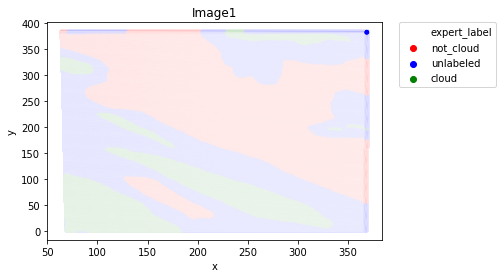

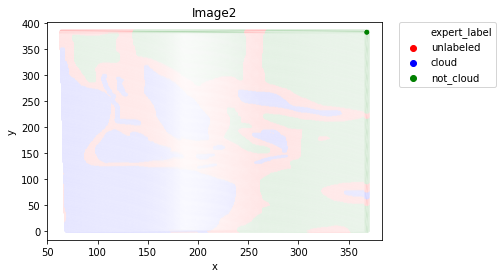

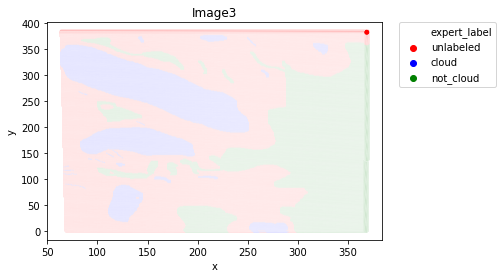

In [5]:
for d in data: 
    to_plot = data[d]
    sb.scatterplot(to_plot['x'],to_plot['y'],hue=to_plot['expert_label'],palette=['r','b','g'])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(d)
    plt.show()


##  Reg Plots

Graphs to show the relationship between the features 



In [6]:

subs = ['cloud','not_cloud','unlabeled']
for d in data: 
    to_plot = data[d]
    plt.title("Regplot for NDAI and CORR for " + d)
    sb.regplot(x='NDAI',y='SD',data=to_plot,marker='+')
    plt.show()
    
        
for d in data: 
    to_plot = data[d]
    plt.title("Regplot for NDAI and CORR "  + " for " + d)
    sb.regplot(x='NDAI',y='CORR',data=to_plot,marker='+')
    plt.show()
        
for d in data: 
    to_plot = data[d]
    plt.title("Regplot for NDAI and SD " + " for " + d)
    sb.regplot(x='NDAI',y='SD',data=to_plot,marker='+')
    plt.show()
    
for d in data: 
    to_plot = data[d]
    plt.title("Regplot for CORR and SD "  + " for " + d)
    sb.regplot(x='CORR',y='SD',data=to_plot,marker='+')
    plt.show() 

'subs = [\'cloud\',\'not_cloud\',\'unlabeled\']\nfor d in data: \n    to_plot = data[d]\n    plt.title("Regplot for NDAI and CORR for " + d)\n    sb.regplot(x=\'NDAI\',y=\'SD\',data=to_plot,marker=\'+\')\n    plt.show()\n    \n        \nfor d in data: \n    to_plot = data[d]\n    plt.title("Regplot for NDAI and CORR "  + " for " + d)\n    sb.regplot(x=\'NDAI\',y=\'CORR\',data=to_plot,marker=\'+\')\n    plt.show()\n        \nfor d in data: \n    to_plot = data[d]\n    plt.title("Regplot for NDAI and SD " + " for " + d)\n    sb.regplot(x=\'NDAI\',y=\'SD\',data=to_plot,marker=\'+\')\n    plt.show()\n    \nfor d in data: \n    to_plot = data[d]\n    plt.title("Regplot for CORR and SD "  + " for " + d)\n    sb.regplot(x=\'CORR\',y=\'SD\',data=to_plot,marker=\'+\')\n    plt.show() '

## Histograms/Bar Charts 

Graphs to show relationship between expert labels and individual features w

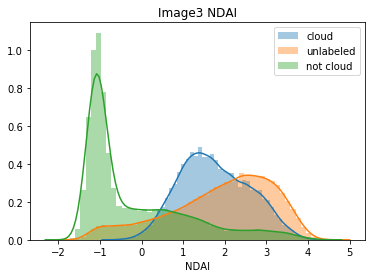

In [7]:
image1 = image3
sb.distplot(image1[image1['expert_label'] == 'cloud' ]['NDAI'],label='cloud')
sb.distplot(image1[image1['expert_label'] == 'unlabeled' ]['NDAI'],label='unlabeled')
sb.distplot(image1[image1['expert_label'] == 'not_cloud' ]['NDAI'],label='not cloud')
plt.title('Image3 NDAI')

plt.legend()

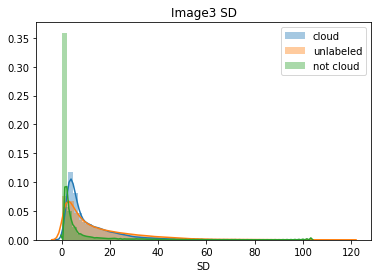

In [8]:
sb.distplot(image1[image1['expert_label'] == 'cloud' ]['SD'],label='cloud')
sb.distplot(image1[image1['expert_label'] == 'unlabeled' ]['SD'],label='unlabeled')
sb.distplot(image1[image1['expert_label'] == 'not_cloud' ]['SD'],label='not cloud')
plt.title('Image3 SD')

plt.legend()

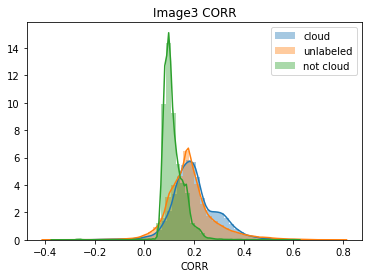

In [9]:
sb.distplot(image1[image1['expert_label'] == 'cloud' ]['CORR'],label='cloud')
sb.distplot(image1[image1['expert_label'] == 'unlabeled' ]['CORR'],label='unlabeled')
sb.distplot(image1[image1['expert_label'] == 'not_cloud' ]['CORR'],label='not cloud')
plt.title('Image3 CORR')
plt.legend()

# Part 2a 
## 1st non-trivial way

In [ ]:
from sklearn.model_selection import train_test_split

In [1]:
# from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [ ]:
X1 = image1.drop("expert_label", axis=1)
y1 = image1["expert_label"]
X2 = image2.drop("expert_label", axis=1)
y2 = image2["expert_label"]
X3 = image3.drop("expert_label", axis=1)
y3 = image3["expert_label"]

In [ ]:
def StratifiedSplit(n_split, X, y):
    
    skf = StratifiedKFold(n_splits=3, shuffle=False)
    skf.get_n_splits(X, y)
    
    for train_idx, test_idx in skf.split(X, y):
        X_sstrain, X_sstest = X.iloc[train_idx], X.iloc[test_idx]
        y_sstrain, y_sstest = y.iloc[train_idx], y.iloc[test_idx]
        
    for train_idx, val_idx in skf.split(X_sstrain, y_sstrain):
        X_ssval = X_sstrain.iloc[val_idx]
        y_ssval = y_sstrain.iloc[val_idx]
    
    return X_sstrain, X_ssval, X_sstest, y_sstrain, y_ssval, y_sstest

In [ ]:
X_sstrain1, X_ssval1, X_sstest1, y_sstrain1, y_ssval1,y_sstest1 = StratifiedSplit(3, X1, y1)

print(X_sstrain1.shape, X_ssval1.shape, X_sstest1.shape)
print(y_sstrain1.shape, y_ssval1.shape, y_sstest1.shape)

X_sstrain2, X_ssval2, X_sstest2, y_sstrain2, y_ssval2, y_sstest2 = StratifiedSplit(3, X2, y2)

print(X_sstrain2.shape, X_ssval2.shape, X_sstest2.shape)
print(y_sstrain2.shape, y_ssval2.shape, y_sstest2.shape)

X_sstrain3, X_ssval3, X_sstest3, y_sstrain3, y_ssval3, y_sstest3 = StratifiedSplit(3, X3, y3)

print(X_sstrain3.shape, X_ssval3.shape, X_sstest3.shape)
print(y_sstrain3.shape, y_ssval3.shape, y_sstest3.shape)

In [ ]:
X_sstr_all = X_sstrain1.append([X_sstrain2, X_sstrain3])
y_sstr_all = y_sstrain1.append([y_sstrain2, y_sstrain3])
X_ssval_all = X_ssval1.append([X_ssval2, X_ssval3])
y_ssval_all = y_ssval1.append([y_ssval2, y_ssval3])
X_sstest_all = X_sstest1.append([X_sstest2, X_sstest3])
y_sstest_all = y_sstest1.append([y_sstest2, y_sstest3])

print(X_sstr_all.shape, y_sstr_all.shape)
print(X_ssval_all.shape, y_ssval_all.shape)
print(X_sstest_all.shape, y_sstest_all.shape)

## 2nd non-trivial way

In [ ]:
print(f"image1 smallest y-coordiante: {image1['y'].min()}")
print(f"image1 greatest y-coordiante: {image1['y'].max()}")
print(f"image1 smallest x-coordiante: {image1['x'].min()}")
print(f"image1 greatest x-coordiante: {image1['x'].max()}")

print(f"image2 smallest y-coordiante: {image2['y'].min()}")
print(f"image2 greatest y-coordiante: {image2['y'].max()}")
print(f"image2 smallest x-coordiante: {image2['x'].min()}")
print(f"image2 greatest x-coordiante: {image2['x'].max()}")

print(f"image3 smallest y-coordiante: {image3['y'].min()}")
print(f"image3 greatest y-coordiante: {image3['y'].max()}")
print(f"image3 smallest x-coordiante: {image3['x'].min()}")
print(f"image3 greatest x-coordiante: {image3['x'].max()}")


In [ ]:
# dimension for y-coord
num_yblocks = (383-2)/3
print("There are {} blocks along the y coord".format(num_yblocks))

# dimension for x-coord
num_xblocks = (369-65)/4
print("There are {} blocks along the x coord".format(num_xblocks))

In [ ]:
train_df = pd.DataFrame()
val_df = pd.DataFrame()
test_df = pd.DataFrame()

x_axis = np.arange(start=65, stop=369, step=4)
y_axis = np.arange(start=2, stop=383, step=3)

for i in x_axis:
    for j in y_axis:
        bck1 = image1[(image1['x'] >= i) & (image1['x'] < i+4) & (image1['y'] >= j) & (image1['y'] < j+3)]
        bck2 = image2[(image2['x'] >= i) & (image2['x'] < i+4) & (image2['y'] >= j) & (image2['y'] < j+3)]
        bck3 = image3[(image3['x'] >= i) & (image3['x'] < i+4) & (image3['y'] >= j) & (image3['y'] < j+3)]
        
        dt1shape = bck1.shape[0]
        dt2shape = bck2.shape[0]
        dt3shape = bck3.shape[0]

        if dt1shape != 0:
            temp_train_image1 = bck1.sample(frac=0.8, replace=False)
            test_1 = bck1.drop(temp_train_image1.index)
            train_1 = temp_train_image1.sample(frac=0.8, replace=False)
            val_1 = temp_train_image1.drop(train_1.index)
            train_df = train_df.append(train_1)
            val_df = val_df.append(val_1)
            test_df = test_df.append(test_1)
        
        if dt2shape != 0:
            temp_train_image2 = bck2.sample(frac=0.8, replace=False)
            test_2 = bck2.drop(temp_train_image2.index)
            train_2 = temp_train_image2.sample(frac=0.8, replace=False)
            val_2 = temp_train_image2.drop(train_2.index)
            train_df = train_df.append(train_2)
            val_df = val_df.append(val_2)
            test_df = test_df.append(test_2)
        
        if dt3shape != 0:
            temp_train_image3 = bck3.sample(frac=0.8, replace=False)
            test_3 = bck3.drop(temp_train_image3.index)
            train_3 = temp_train_image3.sample(frac=0.8, replace=False)
            val_3 = temp_train_image3.drop(train_3.index)
            train_df = train_df.append(train_3)
            val_df = val_df.append(val_3)
            test_df = test_df.append(test_3)

In [ ]:
print(f"Final train dataframe after sampling from each region: {train_df.shape}") 
print(f"Final validation dataframe after sampling from each region: {val_df.shape}") 
print(f"Final test dataframe after sampling from each region: {test_df.shape}")

In [ ]:
X_train = train_df.drop('expert_label', axis=1)
y_train = train_df['expert_label']

X_val = val_df.drop('expert_label', axis=1)
y_val = val_df['expert_label']

X_test = test_df.drop('expert_label', axis=1)
y_test = test_df['expert_label']

# Part 2b

In [ ]:
# split image1 into train and test dataframe
train_img1, test_img1 = train_test_split(image1, test_size=0.3, random_state=42)
print(train_img1.shape, test_img1.shape)

In [ ]:
# split dataframe train_img1 to training set
X_train_1 = train_img1.drop("expert_label", axis=1)
y_train_1 = train_img1["expert_label"]

# # split dataframe test_img1 to test set
X_test_1 = test_img1.drop("expert_label", axis=1)
y_test_1 = test_img1["expert_label"]

print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)

In [ ]:
# split image1 training set and validation set
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_train_1, y_train_1, test_size=0.3, random_state=42)
print(f"Size of Image1 Validation Set: {X_val_1.shape} and {y_val_1.shape}")

In [ ]:
train_img2, test_img2 = train_test_split(image2, test_size = 0.3, random_state=42)
print(train_img2.shape, test_img2.shape)

In [ ]:
# split dataframe train_img2
X_train_2 = train_img2.drop("expert_label", axis=1)
y_train_2 = train_img2["expert_label"]

# # split dataframe test_img2
X_test_2 = train_img2.drop("expert_label", axis=1)
y_test_2 = train_img2["expert_label"]

print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

In [ ]:
# split image2 training set and validation set
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train_2, y_train_2, test_size=0.3, random_state=42)
print(f"Size of Image2 Validation Set: {X_val_2.shape} and {y_val_2.shape}")

In [ ]:
train_img3, test_img3 = train_test_split(image3, test_size = 0.3, random_state=42)
print(train_img3.shape, test_img3.shape)

In [ ]:
# split dataframe train_img3
X_train_3 = train_img3.drop("expert_label", axis=1)
y_train_3 = train_img3["expert_label"]

# # split dataframe test_img3
X_test_3 = test_img3.drop("expert_label", axis=1)
y_test_3 = test_img3["expert_label"]

print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

In [ ]:
# split image3 training set and validation set
X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(X_train_3, y_train_3, test_size=0.3, random_state=42)
print(f"Size of Image3 Validation Set: {X_val_3.shape} and {y_val_3.shape}")

In [ ]:
# combine all training set from three datasets so we can have a larger training set to train model
X_train_all = X_train_1.append([X_train_2, X_train_3])
y_train_all = y_train_1.append([y_train_2, y_train_3])

print(X_train_all.shape)
print(y_train_all.shape)

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
lr = LogisticRegression()

# fit model
lr.fit(X_train_all, y_train_all)

In [ ]:
X_val_all = X_val_1.append([X_val_2, X_val_3])
y_val_all = y_val_1.append([y_val_2, y_val_3]).to_frame().replace({'unlabeled': 'not_cloud', 'cloud': 'not_cloud'})['expert_label']
X_test_all = X_test_1.append([X_test_2, X_test_3])
y_test_all = y_test_1.append([y_test_2, y_test_3]).to_frame().replace({'unlabeled': 'not_cloud', 'cloud': 'not_cloud'})['expert_label']

print(X_val_all.shape)
print(y_val_all.shape)
print(X_test_all.shape)
print(y_test_all.shape)

In [ ]:
# make class predictions for the testing set
y_pred_val = lr.predict(X_val_all)
y_pred_test = lr.predict(X_test_all)

In [ ]:
# classification accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val_all, y_pred_val))
print(accuracy_score(y_test_all, y_pred_test))

# Part 2c 

Text(0.5, 1.0, 'Simple Bar Graph of Feature Mean Differences')

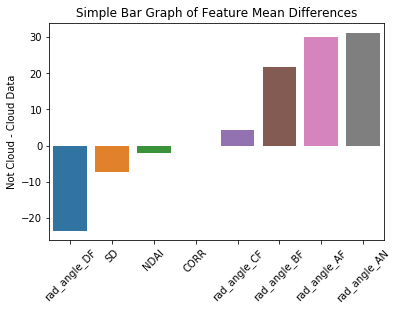

In [15]:
to_graph = not_cloud_data.mean() - cloud_data.mean()
to_graph = to_graph[to_graph.index != 'x']
to_graph = to_graph[to_graph.index != 'y']
to_graph = to_graph.sort_values()
sb.barplot(to_graph.index,to_graph.values)
plt.xticks(rotation=45)
plt.ylabel('Not Cloud - Cloud Data')
plt.title('Simple Bar Graph of Feature Mean Differences')


In [16]:
#Anova Analysis 

from scipy import stats
cloud = cloud_data.drop(columns = ['expert_label','x','y'])
not_cloud = not_cloud_data.drop(columns = ['expert_label','x','y'
                                          ])
x = stats.f_oneway(cloud, not_cloud)
df = pd.DataFrame({'F':x[0],'P_value':x[1]})
df.index = cloud.columns
df

,F,P_value
NDAI,207704.644016,0.000000e+00
SD,38265.372810,0.000000e+00
CORR,116670.701958,0.000000e+00
rad_angle_DF,13967.728120,0.000000e+00
rad_angle_CF,599.931509,2.769065e-132
rad_angle_BF,17456.921592,0.000000e+00
rad_angle_AF,38463.670566,0.000000e+00
rad_angle_AN,45387.509114,0.000000e+00


In [17]:
#Using RFE 

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# create a base classifier used to evaluate a subset of attributes
mod_data = data.drop(columns = ['x','y'])
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(mod_data.drop(columns = 'expert_label'), mod_data['expert_label'])
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
rankings = pd.DataFrame({'column':mod_data.drop(columns='expert_label').columns,'support':rfe.support_,'ranking':rfe.ranking_})
rankings

[ True  True  True False False False False False]
[1 1 1 2 3 5 6 4]


,column,support,ranking
0,NDAI,True,1
1,SD,True,1
2,CORR,True,1
3,rad_angle_DF,False,2
4,rad_angle_CF,False,3
5,rad_angle_BF,False,5
6,rad_angle_AF,False,6
7,rad_angle_AN,False,4


# Part 2d

In [10]:
from sklearn.model_selection import train_test_split

data = image1.append(image2).append(image3)
data = data[data['expert_label'] != 'unlabeled']
cloud_data = data[data['expert_label'] == 'cloud']
not_cloud_data = data[data['expert_label'] == 'not_cloud']
data['expert_label'].replace('cloud',1,inplace=True)
data['expert_label'].replace('not_cloud',0,inplace=True)
a_train, a_test, b_train, b_test = train_test_split(data.drop(columns='expert_label'), data['expert_label'], test_size=0.33, random_state=42)
data_train = a_train
data_train['expert_label'] = b_train 


from sklearn.model_selection import StratifiedKFold
def CVMethodOne(n_split, X, y):
    skf = StratifiedKFold(n_splits=n_split, shuffle=False)
    skf.get_n_splits(X, y)
    X_train  = [] 
    Y_train = [] 
    X_test = [] 
    Y_test = []
    for train_idx, test_idx in skf.split(X, y):
        X_sstrain, X_sstest = X.iloc[train_idx], X.iloc[test_idx]
        y_sstrain, y_sstest = y.iloc[train_idx], y.iloc[test_idx]
        X_train.append(X_sstrain)
        X_test.append(X_sstest)
        Y_test.append(y_sstest)
        Y_train.append(y_sstrain)
    return [X_train,Y_train,X_test,Y_test]

def CVMethodTwo():
    train_df = pd.DataFrame()
    val_df = pd.DataFrame()
    test_df = pd.DataFrame()

    x_axis = np.arange(start=65, stop=369, step=4)
    y_axis = np.arange(start=2, stop=383, step=3)

    for i in x_axis:
        for j in y_axis:
            bck1 = image1[(image1['x'] >= i) & (image1['x'] < i+4) & (image1['y'] >= j) & (image1['y'] < j+3)]
            bck2 = image2[(image2['x'] >= i) & (image2['x'] < i+4) & (image2['y'] >= j) & (image2['y'] < j+3)]
            bck3 = image3[(image3['x'] >= i) & (image3['x'] < i+4) & (image3['y'] >= j) & (image3['y'] < j+3)]

            dt1shape = bck1.shape[0]
            dt2shape = bck2.shape[0]
            dt3shape = bck3.shape[0]

            if dt1shape != 0:
                temp_train_image1 = bck1.sample(frac=0.8, replace=False)
                test_1 = bck1.drop(temp_train_image1.index)
                train_1 = temp_train_image1.sample(frac=0.8, replace=False)
                val_1 = temp_train_image1.drop(train_1.index)
                train_df = train_df.append(train_1)
                val_df = val_df.append(val_1)
                test_df = test_df.append(test_1)
            if dt2shape != 0:
                temp_train_image2 = bck2.sample(frac=0.8, replace=False)
                test_2 = bck2.drop(temp_train_image2.index)
                train_2 = temp_train_image2.sample(frac=0.8, replace=False)
                val_2 = temp_train_image2.drop(train_2.index)
                train_df = train_df.append(train_2)
                val_df = val_df.append(val_2)
                test_df = test_df.append(test_2)

            if dt3shape != 0:
                temp_train_image3 = bck3.sample(frac=0.8, replace=False)
                test_3 = bck3.drop(temp_train_image3.index)
                train_3 = temp_train_image3.sample(frac=0.8, replace=False)
                val_3 = temp_train_image3.drop(train_3.index)
                train_df = train_df.append(train_3)
                val_df = val_df.append(val_3)
                test_df = test_df.append(test_3)
    return [pd.concat([train_df,val_df]),test_df]

In [11]:
from random import randrange 
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
def CVgeneric(classifier,training_set,k,loss_function):
    x = KFold(n_splits=k)
    d = x.split(training_set.index)
    df = {}
    df['Accuracy'] = []
    df['Fold'] = [] 
    to_plot_data = [] 
    k = 1
    for train,test in d:
        train_data = training_set.iloc[train]
        test_data = training_set.iloc[test]
        mod = classifier.fit(X=train_data.drop(columns='expert_label'),y=train_data['expert_label'])
        pred = classifier.predict(test_data.drop(columns='expert_label'))
        truth = test_data['expert_label']
        df['Accuracy'].append(classifier.score(test_data.drop(columns='expert_label'),test_data['expert_label']))
        df['Fold'].append(k)
        k += 1
    mod = classifier.fit(X=training_set.drop(columns='expert_label'),y=training_set['expert_label'])
    pred = classifier.predict(training_set.drop(columns='expert_label'))
    probs = classifier.predict_proba(training_set.drop(columns='expert_label'))
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(training_set['expert_label'], preds)
    roc_auc = metrics.auc(fpr, tpr)
    df['Accuracy'].append(np.mean(df['Accuracy']))
    df['Fold'].append('Average')
    return [pd.DataFrame.from_dict(df),[fpr,tpr,threshold,roc_auc]]
    


In [27]:
def CVgenericMethodOne(classifier,training_set,k,loss_function):
    x = KFold(n_splits=k)
    d = x.split(training_set.index)
    df = {}
    df['Accuracy'] = []
    df['Fold'] = [] 
    iterations = CVMethodOne(k,training_set.drop(columns='expert_label'),training_set['expert_label'])
    for i in range(0,len(iterations[0])):
        train_x = iterations[0][i]
        train_y = iterations[1][i]
        test_x = iterations[2][i]
        test_y = iterations[3][i]
        mod = classifier.fit(X=train_x,y=train_y)
        pred = classifier.predict(test_x)
        df['Accuracy'].append(classifier.score(test_x,test_y))
        df['Fold'].append(i+1)
        #loss = loss_function(train_data)
    mod = classifier.fit(X=training_set.drop(columns='expert_label'),y=training_set['expert_label'])
    pred = classifier.predict(training_set.drop(columns='expert_label'))
    probs = classifier.predict_proba(training_set.drop(columns='expert_label'))
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(training_set['expert_label'], preds)
    roc_auc = metrics.auc(fpr, tpr)
    df['Accuracy'].append(np.mean(df['Accuracy']))
    df['Fold'].append('Average')
    return [pd.DataFrame.from_dict(df),[fpr,tpr,threshold,roc_auc]]


In [14]:
def CVgenericMethodTwo(classifier,training_set,k,loss_function):
    x = CVMethodTwo()
    return CVgeneric(classifier,x[0],k,loss_function)
ab = CVMethodTwo()

# Part 3a and 3b


### Initial Data Setup

In [35]:
data = image1.append(image2).append(image3)
data = data[data['expert_label'] != 'unlabeled']
cloud_data = data[data['expert_label'] == 'cloud']
not_cloud_data = data[data['expert_label'] == 'not_cloud']
data['expert_label'].replace('cloud',1,inplace=True)
data['expert_label'].replace('not_cloud',0,inplace=True)
a_train, a_test, b_train, b_test = train_test_split(data.drop(columns='expert_label'), data['expert_label'], test_size=0.33, random_state=42)
data_train = a_train
data_train['expert_label'] = b_train 
data_test_x = a_test
data_test_y = b_test
ab = data

## KNN 

In [25]:
#KNN Trivial Splitting 
neigh = KNeighborsClassifier(n_neighbors=3)
p = CVgeneric(neigh,ab,5,None)
x = p[1]

p[0]

,Accuracy,Fold
0,0.998985,1
1,0.895129,2
2,0.646586,3
3,0.926330,4
4,0.999193,5
5,0.893245,Average


In [29]:
# KNN Method One Splitting 
neigh = KNeighborsClassifier(n_neighbors=3)
p = CVgenericMethodOne(neigh,data_train.drop(columns=['x','y']).loc[:,['expert_label','NDAI','SD','CORR']],5,None)
x = p[1]

p[0]

,Accuracy,Fold
0,0.896493,1
1,0.892920,2
2,0.892997,3
3,0.891556,4
4,0.892255,5
5,0.893244,Average


In [30]:
# Knn Method Two Splitting 
p = CVgenericMethodTwo(neigh,ab,5,None)
x = p[1]

plt.title('Receiver Operating Characteristic')
plt.plot(x[0], x[1], 'b', label = 'AUC = %0.2f' % x[3])
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
p[0]

KeyboardInterrupt: 

### Logistic Regression  

In [ ]:
#logistic regression Trivial Splitting 
p = CVgeneric(LogisticRegression(),data_train.drop(columns=['x','y']).loc[:,['expert_label','NDAI','SD','CORR']],5,None)
x = p[1]

p[0]

In [ ]:
#logistic regression Method One Splitting 
p = CVgeneric(LogisticRegression(),data_train.drop(columns=['x','y']).loc[:,['expert_label','NDAI','SD','CORR']],5,None)
x = p[1]

p[0]

In [ ]:
#logsitic regression Method Two splitting 
p = CVgenericMethodTwo(LogisticRegression(),ab,5,None)
x = p[1]

plt.title('Logistic Regression Method Two')
plt.plot(x[0], x[1], 'b', label = 'AUC = %0.2f' % x[3])
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
p[0]

### QDA  

In [ ]:
#Trivial 
p = CVgeneric(QuadraticDiscriminantAnalysis(),data_train.drop(columns=['x','y']).loc[:,['expert_label','NDAI','SD','CORR']],5,None)
x = p[1]

p[0]

In [ ]:
#Method One
p = CVgenericMethodOne(QuadraticDiscriminantAnalysis(),data_train.drop(columns=['x','y']).loc[:,['expert_label','NDAI','SD','CORR']],5,None)
x = p[1]
 
p[0]

In [ ]:
#Method Two 
p = CVgenericMethodTwo(QuadraticDiscriminantAnalysis(),ab,5,None)
x = p[1]

plt.title('QDA Method Two')
plt.plot(x[0], x[1], 'b', label = 'AUC = %0.2f' % x[3])
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
p[0]

### Random Forest 

In [ ]:
#Trivial 
mod = RandomForestClassifier(n_estimators=50,random_state=0)
p = CVgeneric(mod,data_train.drop(columns=['x','y']).loc[:,['expert_label','NDAI','SD','CORR']],5,None)
x = p[1]
p[0]

In [ ]:
#Method One
p = CVgenericMethodOne(mod,data_train.drop(columns=['x','y']).loc[:,['expert_label','NDAI','SD','CORR']],5,None)
x = p[1]

p[0]

In [ ]:
#Method Two
mod = RandomForestClassifier(n_estimators=50,random_state=0)
p = CVgenericMethodOne(mod,ab,5,None)
x = p[1]

plt.title('Random Forest Method Two')
plt.plot(x[0], x[1], 'b', label = 'AUC = %0.2f' % x[3])
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
p[0]

# Part 4a

We will look into the random forest as applied to the fold with the lowest accuracy.

In [74]:

#focusing on the model trained on the third fold, which had the lowest accuracy 
x = KFold(n_splits=5)
d = x.split(data_train.index)
classifier = RandomForestClassifier(n_estimators=50,random_state=0)
iterations = CVMethodOne(5,data_train.drop(columns='expert_label').loc[:,['NDAI','SD','CORR']],data_train['expert_label'])
train_x = iterations[0][3]
train_y = iterations[1][3]
mod = classifier.fit(X=train_x,y=train_y)
pred = classifier.predict(data_test_x.loc[:,['NDAI','SD','CORR']])
classifier.score(data_test_x.loc[:,['NDAI','SD','CORR']],data_test_y)
       

0.9388868736890249

In [75]:
# Get numerical feature importances
rf = mod
feature_list = ['NDAI','SD','CORR']
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: NDAI                 Importance: 0.39
Variable: SD                   Importance: 0.31
Variable: CORR                 Importance: 0.3


[None, None, None]

In [76]:
index_list = []
df = {}
df['Variable Importance'] = []
for pair in feature_importances: 
    index_list.append(pair[0])
    df['Variable Importance'].append(pair[1])
d = pd.DataFrame.from_dict(df)
d.index = index_list
d

,Variable Importance
NDAI,0.39
SD,0.31
CORR,0.30


# Part 4b 

In [108]:
incorrect = [] 
correct= [] 
x = data_test_x
x = x.reset_index()
for i in range(0,len(pred)):
    if data_test_y.iloc[i] != pred[i]:
        incorrect.append(int(x.iloc[i,:]['index']))
    else: 
        correct.append(int(x.iloc[i,:]['index']))


In [113]:
incorrect_df = data_test_x[data_test_x.index.isin(incorrect)]
correct_df = data_test_x[data_test_x.index.isin(correct)]
incorrect_df.loc[:,['NDAI','SD','CORR']].describe()

,NDAI,SD,CORR
count,4865.000000,4865.000000,4865.000000
mean,1.374822,8.963276,0.173354
std,1.248512,10.832750,0.081981
min,-1.634195,0.312184,-0.211880
25%,0.651565,2.779175,0.120778
50%,1.449404,5.111278,0.159152
75%,2.344949,10.491170,0.211835
max,4.196991,99.267700,0.721547


In [114]:
correct_df.loc[:,['NDAI','SD','CORR']].describe()

,NDAI,SD,CORR
count,60608.000000,60608.000000,60608.000000
mean,0.611875,6.290293,0.187943
std,1.459273,8.718341,0.111952
min,-1.841971,0.198708,-0.353672
25%,-0.885413,1.004849,0.113629
50%,0.644263,3.052425,0.148052
75%,1.898180,7.789158,0.243183
max,4.338682,110.467640,0.796298


In [ ]:
incorrect_df = data_test_x[data_test_x.index.isin(incorrect)]
correct_df = data_test_x[data_test_x.index.isin(correct)]
incorrect_df.loc[:,['NDAI','SD','CORR']].describe()

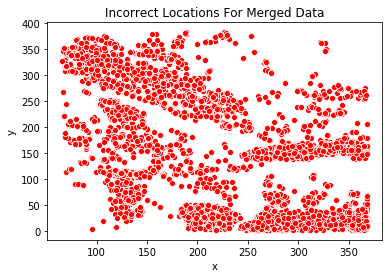

In [121]:
to_plot = incorrect_df
sb.scatterplot(to_plot['x'],to_plot['y'],color='red')
plt.title('Incorrect Locations For Merged Data')
plt.show()

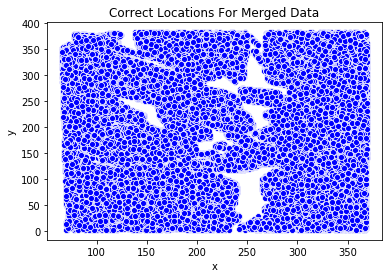

In [122]:
to_plot = correct_df
sb.scatterplot(to_plot['x'],to_plot['y'],color='blue')
plt.title('Correct Locations For Merged Data')
plt.show()